=================================================================================

Nama : Evan Juanto

Batch : BSD-006

=================================================================================

# 1. Introduction

### Background 
The dataset consists of various demographic and financial attributes related to individuals, which are used to predict their income levels. By analyzing the impact of these factors on income, we can build robust supervised learning models, perform hyperparameter tuning, and improve the models for better accuracy and deployment in real-world scenarios.

### Problem Statement

The objective of this project is to predict whether an individual earns more than 50,000 per year based on various demographic and financial attributes. This problem is a binary classification task where the target variable is 'salary', indicating whether an individual's income exceeds 50,000. To address this problem, we will implement and evaluate several machine learning algorithms, including Random Forest, Decision Tree, Support Vector Classifier (SVC), XGBoost, and K-Nearest Neighbors (KNN). By using the F1 score, we aim to achieve a model that not only identifies positive instances accurately but also minimizes the occurrence of false negatives and false positives.

# 2. Import Libraries

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import FE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder ,MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
# import Model
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from phik import phik_matrix
import pickle
from xgboost import XGBClassifier

# 3. Data Loading

I got the data from Kaggle, in the form of a CSV 

[link](https://www.kaggle.com/datasets/ayessa/salary-prediction-classification/data)

Start by loading the CSV file into a pandas DataFrame.

In [2]:
# Load the data
df = pd.read_csv('salary.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Feature Description :

- age: the age of an individual
- workclass: a general term to represent the employment status of an individual
- fnlwgt: final weight. This is the number of people the census believes the entry represents..
- education: the highest level of education achieved by an individual.
- education­num: the highest level of education achieved in numerical form.
- marital­status: marital status of an individual.
- occupation: the general type of occupation of an individual
- relationship: represents what this individual is relative to others.
- race: Descriptions of an individual’s race
- sex: the sex of the individual
- capital­gain: capital gains for an individual
- capital­loss: capital loss for an individual
- hours­per­week: the hours an individual has reported to work per week
- native­country: country of origin for an individual


Understand the Data
Get a basic understanding of the data by examining its structure


In [3]:
# Check the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Identify and define the numerical, categorical ordinal, categorical nominal, and categorical encoded data types within the dataset.

In [4]:
# Function to check unique values in each column
def check_unique_values(df):
    unique_values_dict = {}
    for column in df.columns:
        unique_values = df[column].unique()
        unique_values_dict[column] = unique_values
        print(f"Column '{column}' has {len(unique_values)} unique values: {unique_values[:10]}")
    return unique_values_dict

# Call the function and get the unique values
unique_values_dict = check_unique_values(df)

Column 'age' has 73 unique values: [39 50 38 53 28 37 49 52 31 42]
Column 'workclass' has 9 unique values: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Column 'fnlwgt' has 21648 unique values: [ 77516  83311 215646 234721 338409 284582 160187 209642  45781 159449]
Column 'education' has 16 unique values: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate']
Column 'education-num' has 16 unique values: [13  9  7 14  5 10 12 11  4 16]
Column 'marital-status' has 7 unique values: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Column 'occupation' has 15 unique values: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct']
Column 'relationship' ha

- Numerical : `age`,`fnlwgt`,`capital-gain`,`capital-loss`,`hours-per-week`
- Categorical Ordinal : `education`
- Categorical Nominal : `workclass`, `marital-status`,`occupation`,`relationship`,`race`,`sex`,`native-country`
- Categorical Encoded : `education-num` encoded from column `education`

Because many of the unique values ​​of the ' Own-child' column objects have spaces, I want to change them to have no spaces like 'Own-child'

In [5]:
# Function to remove spaces
for i in df.select_dtypes(include=object).columns.tolist():
    df[i] = df[i].str.strip()

Because in the data I got from Kaggle there is data that is '?', I will change it to missing values

In [6]:
# Replace '?' to nan
df = df.replace('?',np.nan)

### Check Duplicate Rows

In [7]:
# check duplicate rows
df.duplicated().sum()

24

There are 24 duplicate data, I will remove the duplicate data

In [8]:
# Drop duplicate rows
df = df.drop_duplicates()
# Check after drop
df.duplicated().sum()

0

After I carry out the data loading and cleaning process, the data is ready for further analysis through the EDA process

# 4. EDA


c:\Users\angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


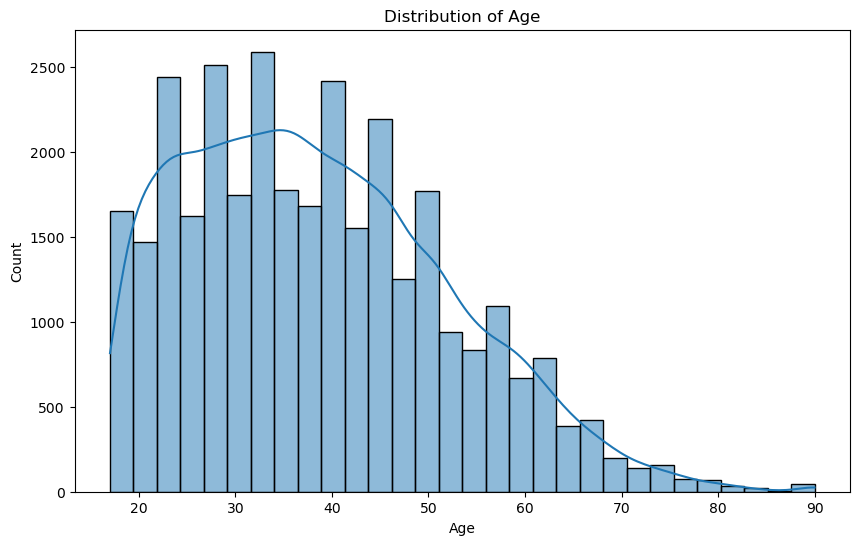

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- The majority of individuals fall within the age range of 20 to 50 years, indicating a predominantly young to middle-aged population.

c:\Users\angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


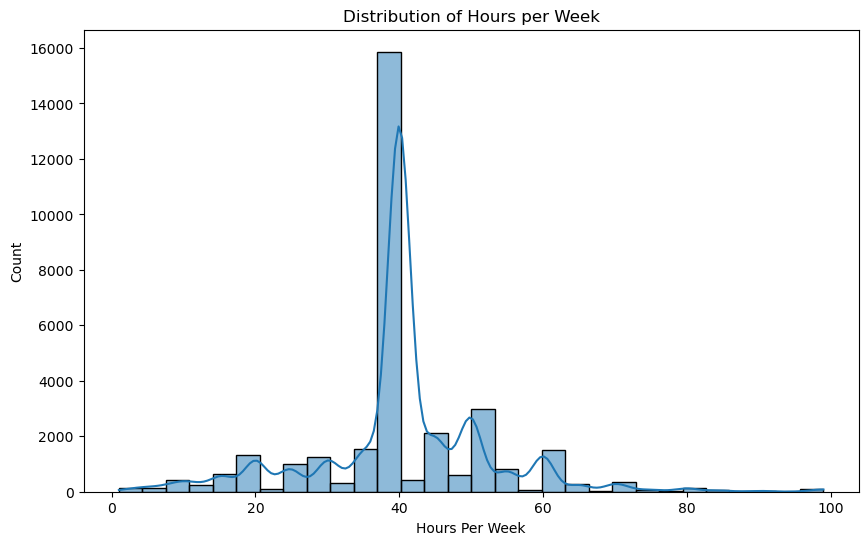

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], kde=True, bins=30)
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours Per Week')
plt.ylabel('Count')
plt.show()

-  The majority of individuals work around 40 hours per week, as indicated by the highest peak in the histogram.

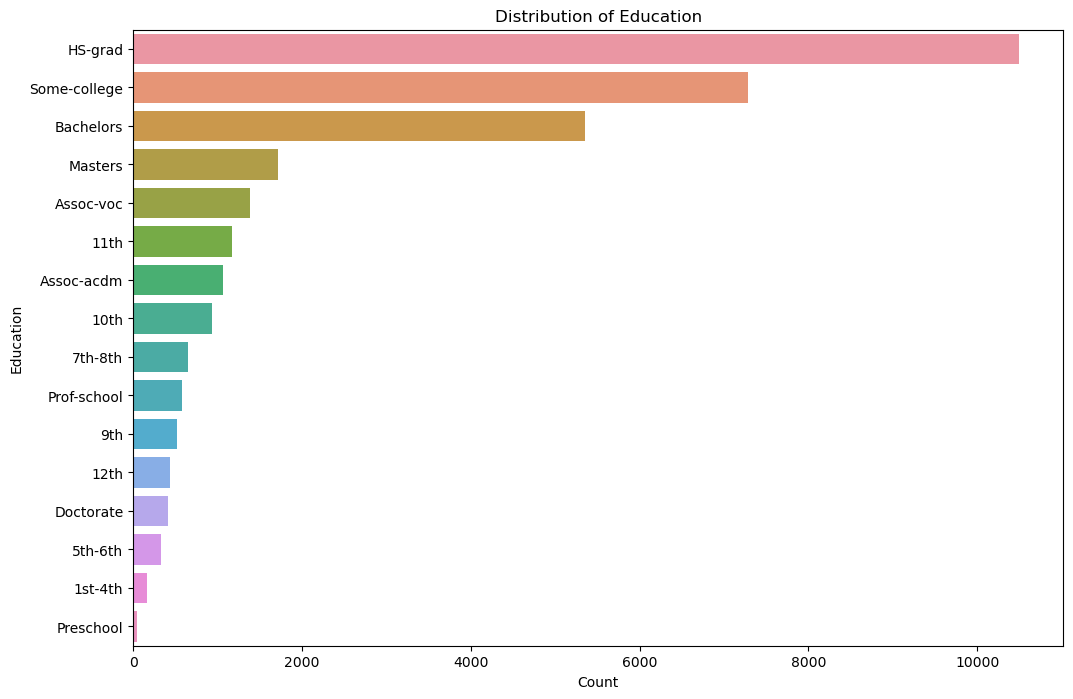

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Distribution of Education')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()

- HS-grad has the highest count
- Some-college The second highest count

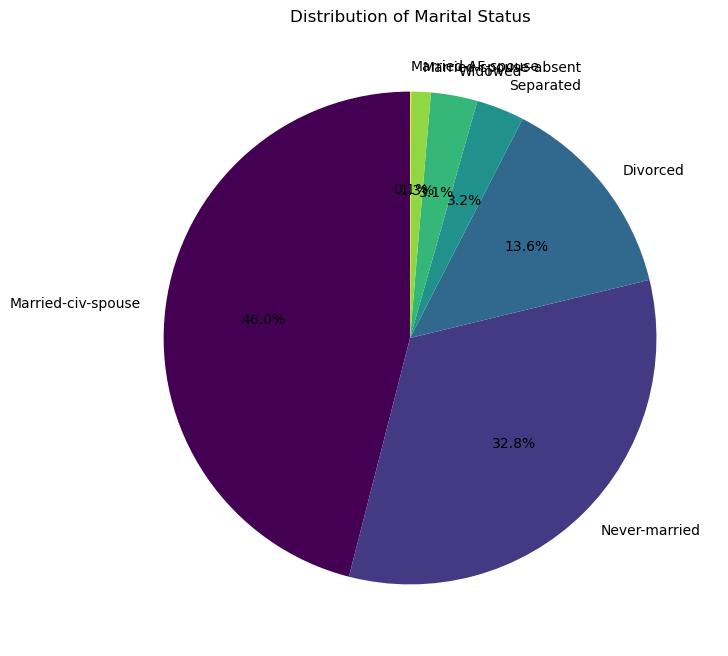

In [12]:
plt.figure(figsize=(8, 8))
df['marital-status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Distribution of Marital Status')
plt.ylabel('')
plt.show()

- Married-civ-spouse Represents the largest group, making up 46.0% of the population.
- Never-married The second-largest group, accounting for 32.8% of the population.

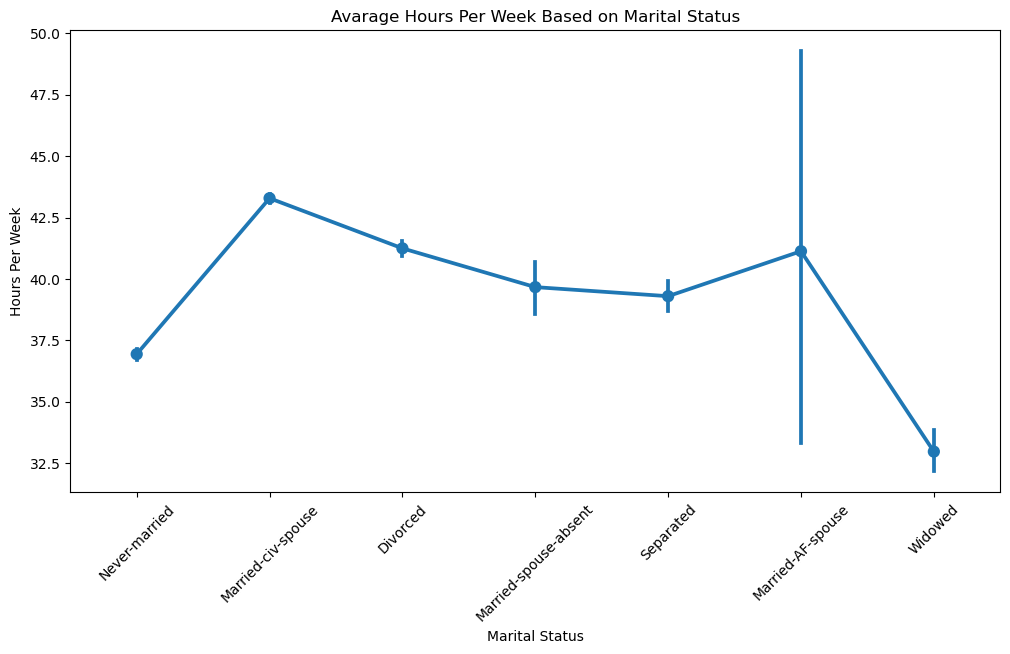

In [13]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='marital-status', y='hours-per-week', data=df)
plt.title('Avarage Hours Per Week Based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Hours Per Week')
plt.xticks(rotation=45)
plt.show()

- There is a noticeable difference in the average hours worked per week based on marital status.
- Married individuals, tend to work the most hours.
- Widowed and never-married individuals work the least number of hours on average.

c:\Users\angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


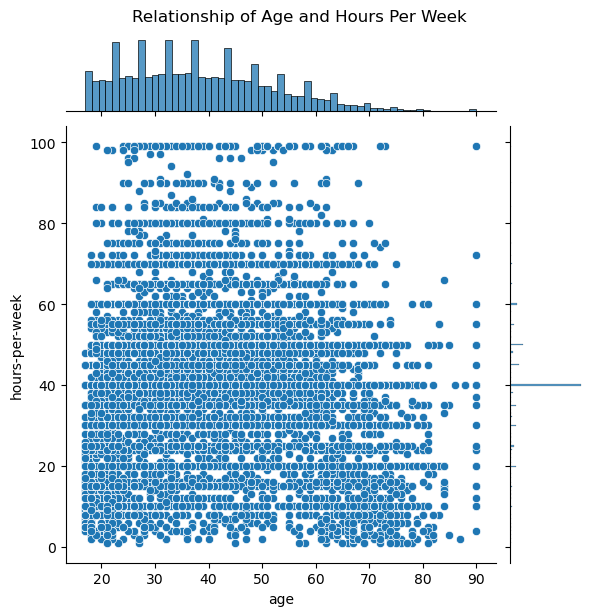

In [14]:
sns.jointplot(x='age', y='hours-per-week', data=df, kind='scatter')
plt.suptitle('Relationship of Age and Hours Per Week', y=1.02)
plt.show()

c:\Users\angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

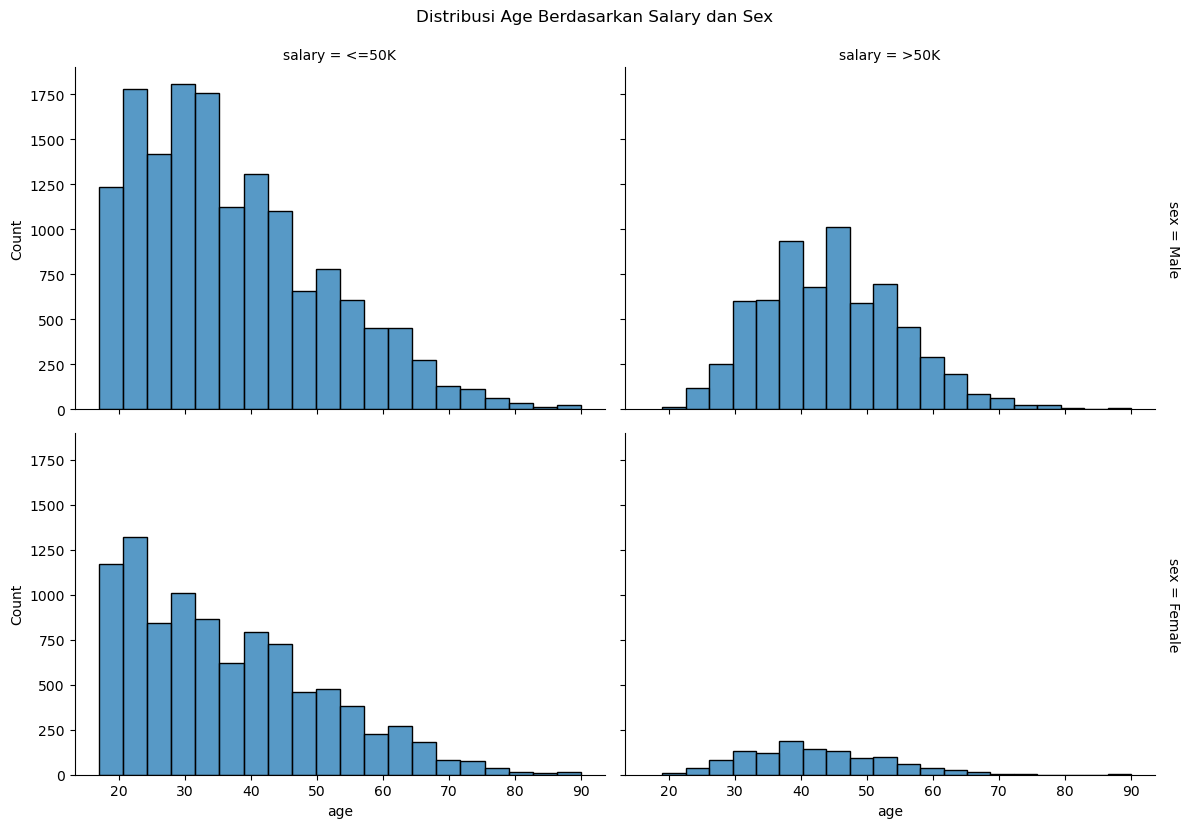

In [15]:
g = sns.FacetGrid(df, col='salary', row='sex', margin_titles=True, height=4, aspect=1.5)
g.map(sns.histplot, 'age', bins=20)
g.fig.suptitle('Distribusi Age Berdasarkan Salary dan Sex', y=1.03)
plt.show()

- Salary <= 50K:
  - Male: The distribution of age shows a peak around the late 20s to early 30s, followed by a gradual decline. Most males in this category are younger.
  - Female: The distribution is similar to that of males but generally lower in count. The peak is also around the late 20s to early 30s, with a gradual decline as age increases.
- Salary > 50K:
  - Male: The distribution peaks around the age range of 40 to 50. This suggests that males earning more than $50K are generally older, with fewer individuals in the younger age brackets.
  - Female: The distribution shows a peak around the same age range as males but with a significantly lower count. This indicates fewer females earning more than $50K compared to males, with the majority being in the middle-aged bracket.

# 5. Feature Engineering

### Split X and y 
Separate the dataset into feature variables (X) and the target variable (y)
X = Features 
y = Target

In [16]:
# Define the feature variables (X) and the target variable (y)
X = df.drop(columns='salary')
y = df['salary']

Because my target variable is still an object I want to change it to an interger, I will encode it manually like LabelEncoder

In [17]:
# check unique value from target
y.unique()

array(['<=50K', '>50K'], dtype=object)

Change '<=50K' to 0 and '>50K' to 1

In [18]:
#Change '<=50K' to 0 and '>50K' to 1
y = y.str.replace('<=50K','0')
y = y.str.replace('>50K','1')
# Check after change
y.unique()

array(['0', '1'], dtype=object)

After successfully changing it to '0' and '1', I will change the data type to interger

In [19]:
# Change datatype
y = y.astype(int)
# check after change
y.dtype

dtype('int32')

### Split Train data and Test data

In [20]:
# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)
print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
X_train

Train size :  (26029, 14)
Test size :  (6508, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
12359,39,Federal-gov,103984,Bachelors,13,Divorced,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States
24230,51,Local-gov,133336,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,40,United-States
28112,61,NaN,158712,HS-grad,9,Divorced,NaN,Not-in-family,White,Female,0,0,99,United-States
3302,61,Private,92691,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,3,United-States
8787,20,Private,34590,Some-college,10,Never-married,Farming-fishing,Own-child,White,Male,0,0,60,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10180,17,Private,297246,11th,7,Never-married,Priv-house-serv,Own-child,White,Female,0,0,9,United-States
9651,34,Private,188900,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
22290,33,Local-gov,100734,HS-grad,9,Divorced,Tech-support,Not-in-family,White,Female,0,0,55,United-States
30035,27,Private,401508,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0,0,40,United-States


### Missing-Values Handling

First i need to identify missing values

In [21]:
# identify missing values
X_train.isnull().sum()

age                  0
workclass         1481
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1487
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     474
dtype: int64

there are 1481 missing values ​​in `workclass`, 1487 in `occupation`, and 474 in `native-country` 

Because the number of missing values ​​exceeds 5%, I will use the fill method to handle missing values. Because the column that has missing values ​​is a categorical column, I will fill using mode

In [22]:
#Fill missing value with mode
X_train.fillna(X_train.mode().iloc[0], inplace=True)
#Check after fill
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

### Outliers handling


Before handling outliers, I have to know the distribution of the data, because each distribution has a different method


In [23]:
#make a list to enter data
normal = []
skew = []
extreme = []
# loop process to enter the list above
for i in X_train.select_dtypes(include=np.number).columns.tolist():
    if X_train[i].skew() < 0.5 and X_train[i].skew() > -0.5:
        normal.append(i)
    elif X_train[i].skew() > 1 or X_train[i].skew() < -1:
        extreme.append(i)
    else:
        skew.append(i)

print("Normal columns:", normal)
print("Skew columns:", skew)
print("Extreme skew columns:", extreme)

Normal columns: ['education-num', 'hours-per-week']
Skew columns: ['age']
Extreme skew columns: ['fnlwgt', 'capital-gain', 'capital-loss']


After separating it into a list based on the distribution of each data, I will carry out a capping process to handle outliers.

Columns `capital-gain`, and `capital-loss` I will not handle the outliers because the varience of the data to low

In [24]:
# outliers handling normal distribution
winsorizer_normal = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables=normal,
                             missing_values='ignore')

X_train_capped = winsorizer_normal.fit_transform(X_train)
# outliers handling skew distribution
winsorizer_normal = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=skew,
                             missing_values='ignore')

X_train_capped = winsorizer_normal.fit_transform(X_train)
# outliers handling extreme skew distribution
winsorizer_normal = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables='fnlwgt',
                             missing_values='ignore')

X_train_capped = winsorizer_normal.fit_transform(X_train)

### Feature Selection

The main goal of feature selection is to improve the performance of the model by eliminating irrelevant or redundant features, which can reduce overfitting, improve accuracy, and decrease training time.

I need to identify correlation features with target. Using phik_matrix() to see correlation

In [25]:
#combine xtrain with ytrain sebagai train data
train_data = pd.concat([X_train_capped, y_train], axis=1)
#remove columns duplicate 
train_data = train_data.loc[:,~train_data.columns.duplicated()]
phik_train = train_data.phik_matrix() 
selected_features_train = phik_train['salary']

interval columns not set, guessing: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']


In [26]:
#check corr
selected_features_train

age               0.410090
workclass         0.221346
fnlwgt            0.050094
education         0.465201
education-num     0.468460
marital-status    0.415946
occupation        0.439305
relationship      0.619824
race              0.081799
sex               0.330319
capital-gain      0.372755
capital-loss      0.198559
hours-per-week    0.356783
native-country    0.111720
salary            1.000000
Name: salary, dtype: float64


My threshold for Features is 0.2, if the feature correlation is below 0.2 with the target, I will drop the column

because the correlation between `education` and `education-num` is almost the same, I will drop one of the columns because they can represent each other

In [27]:
# drop train feature
X_train_capped = X_train_capped.drop(['fnlwgt','education-num','race','capital-loss','native-country'],axis=1)
# drop test feature
X_test = X_test.drop(['fnlwgt','education-num','race','capital-loss','native-country'],axis=1)

In [28]:
# check after drop
X_train_capped

,age,workclass,education,marital-status,occupation,relationship,sex,capital-gain,hours-per-week
12359,39,Federal-gov,Bachelors,Divorced,Exec-managerial,Unmarried,Female,0,40
24230,51,Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,Male,15024,40
28112,61,Private,HS-grad,Divorced,Craft-repair,Not-in-family,Female,0,99
3302,61,Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,Male,0,3
8787,20,Private,Some-college,Never-married,Farming-fishing,Own-child,Male,0,60
...,...,...,...,...,...,...,...,...,...
10180,17,Private,11th,Never-married,Priv-house-serv,Own-child,Female,0,9
9651,34,Private,Bachelors,Married-civ-spouse,Exec-managerial,Wife,Female,0,40
22290,33,Local-gov,HS-grad,Divorced,Tech-support,Not-in-family,Female,0,55
30035,27,Private,HS-grad,Never-married,Other-service,Unmarried,Female,0,40


### Split numerical and categorical Features

To continue with the Cadinality Check process, I separate `X_train` from `X_test` based on categorical and numerical

In [29]:
# split  numerical and categorical
num_cols = X_train_capped.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train_capped.select_dtypes(include=object).columns.tolist()

print(f'numerical columns   : {num_cols}')
print(f'categorical columns : {cat_cols}')

numerical columns   : ['age', 'capital-gain', 'hours-per-week']
categorical columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex']


In [30]:
# split  numerical and categorical
X_train_num = X_train_capped[num_cols]
X_test_num = X_test[num_cols]

X_train_cat = X_train_capped[cat_cols]
X_test_cat = X_test[cat_cols]

In [31]:
# Check
X_train_cat

,workclass,education,marital-status,occupation,relationship,sex
12359,Federal-gov,Bachelors,Divorced,Exec-managerial,Unmarried,Female
24230,Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,Male
28112,Private,HS-grad,Divorced,Craft-repair,Not-in-family,Female
3302,Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,Male
8787,Private,Some-college,Never-married,Farming-fishing,Own-child,Male
...,...,...,...,...,...,...
10180,Private,11th,Never-married,Priv-house-serv,Own-child,Female
9651,Private,Bachelors,Married-civ-spouse,Exec-managerial,Wife,Female
22290,Local-gov,HS-grad,Divorced,Tech-support,Not-in-family,Female
30035,Private,HS-grad,Never-married,Other-service,Unmarried,Female


### Cardinality Check

I perform cardinality checks as part of feature engineering to help ensure that the machine learning models built are more efficient

In [32]:
#check number of unique char .nunique()
cardinality_train = X_train_cat.nunique()

cardinality_test = X_test_cat.nunique()

In [33]:
cardinality_train

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
sex                2
dtype: int64

### Scaling & Encoding

I will do Scaling and encoding for my features. For numerical data I will first find out the distribution of the data, if it is a normal distribution I will use StandardScaler, if it is a skew distribution I will use MinMaxScaler. For the encoding process, the `education` column is an ordinal categorical type, I will use OrdinalEncoder for the `education` column, while other columns will use OneHotEncoder for the encoding process because the other columns are nominal categorical types

In [34]:
# indentify age skewness
X_train_capped['age'].skew()

0.5573775960759374

In [35]:
# indentify hours-per-week skewness
X_train_capped['hours-per-week'].skew()

0.23691683226064358

In [36]:
# identify capital-gain skewness
X_train_capped['capital-gain'].skew()

11.983594445866409


From the check process above, the `age` and `hours-per-week` columns are numerical columns that have a normal distribution, while the `capital-gain` column is a numerical column that has a skewed distribution.

Next, I will separate each data into a list, for scaling and encoding processing

In [37]:
# Specify the columns
num_cols_normal = ['age','hours-per-week']
num_cols_skew = ['capital-gain']
cat_cols_ordinal = ['education']
cat_cols_nominal = ['marital-status','occupation','relationship','sex','workclass']


I will use ColumnTransformer to perform the scaling and encoding process. This will make it easier for me to scale and encode because it can be combined

In [38]:
# Column Transformer to combine scaling and encoding
ct = ColumnTransformer([
    ('scalernormal', StandardScaler(), num_cols_normal), #normal distribution scaling
    ('scalerskew', MinMaxScaler(),num_cols_skew), # Skewed distribution scaling
    ('encodernominal', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), cat_cols_nominal), # Nominal Encoder
    ('encoderordinal', OrdinalEncoder(handle_unknown='use_encoded_value',categories=[['Preschool','1st-4th','5th-6th','7th-8th','9th','10th',
                                                                                      '11th','12th','HS-grad','Some-college','Assoc-voc','Assoc-acdm',
                                                                                      'Bachelors','Masters','Prof-school','Doctorate']],unknown_value=-1), cat_cols_ordinal), # Ordinal Encoder


],remainder='passthrough')

# 6. Model Definition

In this process I will use a pipeline to combine ColumnTransformer and model sequentially, I will try 5 different models: RandomForestClassifier, KNeighborClassifier, DecisionTreeClassifier, SVC, and XGBClassifier



In [39]:
# Define the pipelines
pipe_rf = make_pipeline(ct, RandomForestClassifier(random_state=5))
pipe_knn = make_pipeline(ct, KNeighborsClassifier())
pipe_dt = make_pipeline(ct, DecisionTreeClassifier(random_state=5))
pipe_svc = make_pipeline(ct,SVC())
pipe_xgb = make_pipeline(ct,XGBClassifier())

cross-validation to evaluate the performance of different machine learning models. 

in this cross_val_score process I will divide the train data into 5 folds,  using f1 as a scoring metric to reduce false positives and false negatives

In [40]:
# Perform cross-validation
cv_rf_model = cross_val_score(pipe_rf, X_train_capped,y_train,cv=5,scoring='f1',n_jobs=-1)
cv_dt_model = cross_val_score(pipe_dt, X_train_capped,y_train,cv=5,scoring='f1',n_jobs=-1)
cv_knn_model = cross_val_score(pipe_knn, X_train_capped,y_train,cv=5,scoring='f1',n_jobs=-1)
cv_svc_model = cross_val_score(pipe_svc, X_train_capped,y_train,cv=5,scoring='f1',n_jobs=-1)
cv_xgb_model = cross_val_score(pipe_xgb, X_train_capped,y_train,cv=5,scoring='f1',n_jobs=-1)

By using cross-validation, I can obtain a reliable estimate of each model's performance on unseen data, helping to compare and select the best model

Next , compare the performance of different models using cross-validation scores. and identify the model with the highest mean F1 score.

In [41]:
name_model = []
cv_score = 0
# Loop through cross-validation scores and model names
for cv,name in zip([cv_rf_model,cv_dt_model,cv_knn_model,cv_svc_model,cv_xgb_model],
 ['Random Forest','DecisionTree','KNN','SVC','XGB']):
 print(name)

 print('F1 Score - All - Cross Validation  : ', cv)
 print('F1 Score - Mean - Cross Validation : ', cv.mean())
 print('F1 Score - Std - Cross Validation  : ', cv.std())
 print('-'*50)
 name_model.append(name)
 # Update best model if current model has a higher mean F1 score
 if cv.mean() > cv_score:
  cv_score = cv.mean()
  best_model = name
else:
    pass
# Print the best model and its cross-validation mean F1 score
print(f'Best Model: {best_model}')
print(f'Cross Val Mean from Best Model: {cv_score}')

Random Forest
F1 Score - All - Cross Validation  :  [0.62668919 0.62945867 0.65051903 0.64038546 0.64823479]
F1 Score - Mean - Cross Validation :  0.6390574274629097
F1 Score - Std - Cross Validation  :  0.009617334586321788
--------------------------------------------------
DecisionTree
F1 Score - All - Cross Validation  :  [0.58548387 0.59560878 0.58920478 0.61056911 0.60718611]
F1 Score - Mean - Cross Validation :  0.5976105301779429
F1 Score - Std - Cross Validation  :  0.009811584500334928
--------------------------------------------------
KNN
F1 Score - All - Cross Validation  :  [0.59423318 0.61092437 0.61418008 0.61144321 0.60490694]
F1 Score - Mean - Cross Validation :  0.6071375552953071
F1 Score - Std - Cross Validation  :  0.0071270515576715
--------------------------------------------------
SVC
F1 Score - All - Cross Validation  :  [0.55435847 0.56153846 0.58932039 0.59697118 0.57198255]
F1 Score - Mean - Cross Validation :  0.5748342097983546
F1 Score - Std - Cross Valida

- The Random Forest model shows relatively high performance with a stable mean F1 score and low variance, indicating consistent results across folds.
- The Decision Tree model has the lowest mean F1 score among the models tested, suggesting it is the least effective model for this dataset.
- The K-Nearest Neighbors (KNN) model has a moderate mean F1 score with low variance, indicating it performs consistently but not as well as some other models.
- The Support Vector Classifier (SVC) has the highest standard deviation, indicating more variability in performance across folds. It also has one of the lower mean F1 scores, suggesting it may not be the best choice for this dataset.
- The XGBoost (XGB) model has the highest mean F1 score and a low standard deviation, indicating it performs best overall and consistently across different folds.

The XGBoost model is identified as the best performing model based on the highest mean F1 score, suggesting it is the most effective model for this dataset.

# 7. Model Training

From the cross-validation that has been carried out, I will use the XGBoost Model as the model for my machine learning. and will carry out model training using XGBoost

In [42]:
# Fit the XGBoost model
model_xgb = pipe_xgb.fit(X_train_capped,y_train)
model_xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scalernormal',
                                                  StandardScaler(),
                                                  ['age', 'hours-per-week']),
                                                 ('scalerskew', MinMaxScaler(),
                                                  ['capital-gain']),
                                                 ('encodernominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['marital-status',
                                                   'occupation', 'relationship',
                                                   'sex', 'workclass']),
                                                 ('encode...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# 8 .Model Evaluation

evaluating the model performance on the train set and test set

- ### Train Set :

F1 Score - Train Set  :  0.7499783493548108 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     19792
           1       0.82      0.69      0.75      6237

    accuracy                           0.89     26029
   macro avg       0.86      0.82      0.84     26029
weighted avg       0.89      0.89      0.89     26029
 

Confusion Matrix      : 


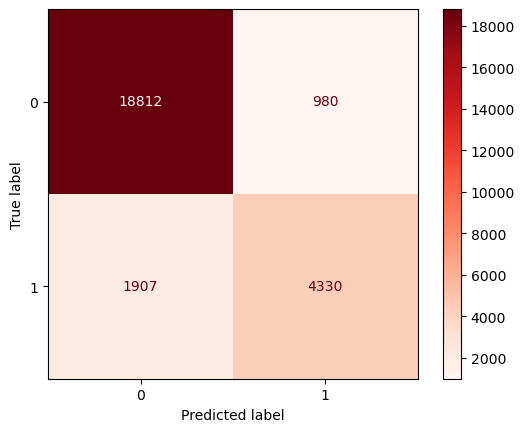

In [43]:
# Model Prediction on Train Set
y_pred_train = model_xgb.predict(X_train_capped)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_xgb, X_train_capped, y_train, cmap='Reds'))

- False Positives : 980
- False Negative : 1907

- There are a few instances where negative cases were misclassified as positive, but the number is relatively low.

- The model correctly identifies a reasonable number of positive instances but can be improved.

- Overall, the model shows a strong performance in identifying negative instances but needs improvement

- ### Test Set :

F1 Score - Test Set  :  0.7015777106411547 

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4906
           1       0.76      0.65      0.70      1602

    accuracy                           0.86      6508
   macro avg       0.83      0.79      0.81      6508
weighted avg       0.86      0.86      0.86      6508
 

Confusion Matrix      : 


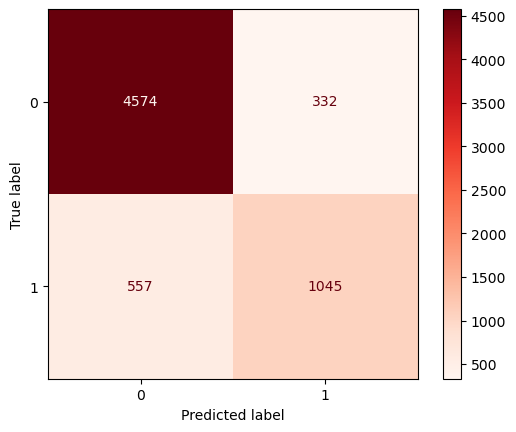

In [44]:
# Model Prediction on Test Set
y_pred_test = model_xgb.predict(X_test)
print('F1 Score - Test Set  : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test, cmap='Reds'))

- False Positives : 332
- False Negatives : 557
- There are relatively few instances where negative cases were misclassified as positive, indicating good performance in this area.
- Overall, the model shows a strong performance in identifying negative instances but needs improvement

In [45]:
all_reports = {}

def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # Calculate confusion matrix for the test set
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()
    
    score_reports = {
        'train - f1_score': f1_score(y_train, y_pred_train),
        'test - f1_score': f1_score(y_test, y_pred_test),
        'test - false positive': fp_test,
        'test - false negative': fn_test,
    }
    all_reports[name] = score_reports
    return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - f1_score,0.749978
test - f1_score,0.701578
test - false positive,332.000000
test - false negative,557.000000


Create a function to make it easier to compare it with a model that has gone through the Hyperparameter Tuning process

# Hyperparameter Tuning

To find the optimal set of hyperparameters that result in the best performance on a given dataset.
and to prevent overfitting or underfitting by balancing the model's complexity.

In [46]:
# define parameter 
grid_search_params =  {
    'xgbclassifier__n_estimators': [100, 200, 250,300],
    'xgbclassifier__max_depth': [3, 4, 5, 6],  
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
    'xgbclassifier__subsample': [0.6, 0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
    'xgbclassifier__gamma':[0,0.1,0.2]
}

grid_search_params

{'xgbclassifier__n_estimators': [100, 200, 250, 300],
 'xgbclassifier__max_depth': [3, 4, 5, 6],
 'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
 'xgbclassifier__subsample': [0.6, 0.8, 1.0],
 'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
 'xgbclassifier__gamma': [0, 0.1, 0.2]}

Using Grid Search Method to find the best parameter

In [47]:
%%time
# using grid search to find best parameter
xgb_gridcv = GridSearchCV(estimator=pipe_xgb,
                          param_grid=grid_search_params,
                          cv=5,
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2)
xgb_gridcv.fit(X_train_capped, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
CPU times: total: 7min 5s
Wall time: 10min 34s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scalernormal',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'hours-per-week']),
                                                                        ('scalerskew',
                                                                         MinMaxScaler(),
                                                                         ['capital-gain']),
                                                                        ('encodernominal',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['marital-status',
                                                                          'occupation',
                                                                          'relationship',...
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgbclassifier__gamma': [0, 0.1, 0.2],
                         'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
                         'xgbclassifier__max_depth': [3, 4, 5, 6],
                         'xgbclassifier__n_estimators': [100, 200, 250, 300],
                         'xgbclassifier__subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=2)

In [48]:
#Retrieve the best parameters
xgb_gridcv.best_params_

{'xgbclassifier__colsample_bytree': 0.8,
 'xgbclassifier__gamma': 0.2,
 'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__n_estimators': 200,
 'xgbclassifier__subsample': 0.8}

Dari hasil Grid Search, saya menemukan parameter terbaik untuk digunakan di model saya :
- xgbclassifier__colsample_bytree: 0.8,
- xgbclassifier__gamma: 0.2,
- xgbclassifier__learning_rate: 0.1,
- xgbclassifier__max_depth: 5,
- xgbclassifier__n_estimators: 200,
- xgbclassifier__subsample: 0.8

In [49]:
# Retrieve the best estimator
xgbgridcv_best = xgb_gridcv.best_estimator_

Evaluate the best estimator on the train set and test set to ensure it generalizes well to unseen data.

- ### Train Set :

F1 Score - Test Set   :  0.7190147611145078 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     19792
           1       0.79      0.66      0.72      6237

    accuracy                           0.88     26029
   macro avg       0.84      0.80      0.82     26029
weighted avg       0.87      0.88      0.87     26029
 

Confusion Matrix      : 


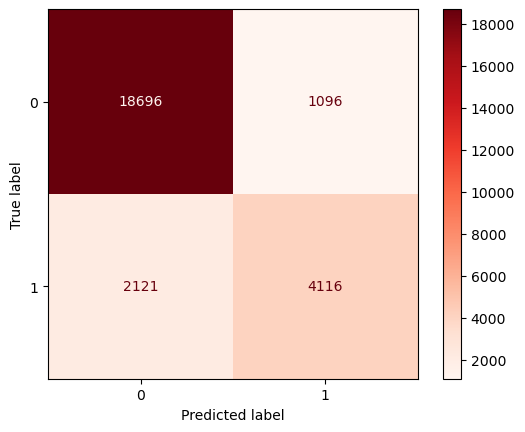

In [50]:
y_pred_train = xgbgridcv_best.predict(X_train_capped)

print('F1 Score - Test Set   : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgbgridcv_best, X_train_capped, y_train, cmap='Reds'))

For Train set there was an increase in 

- False Positives: 1096
- False Negative: 2121

there is a decrease in model performance for the train set

- ### Test Set :

F1 Score - Test Set   :  0.7159663865546219 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4906
           1       0.78      0.66      0.72      1602

    accuracy                           0.87      6508
   macro avg       0.84      0.80      0.82      6508
weighted avg       0.87      0.87      0.87      6508
 

Confusion Matrix      : 


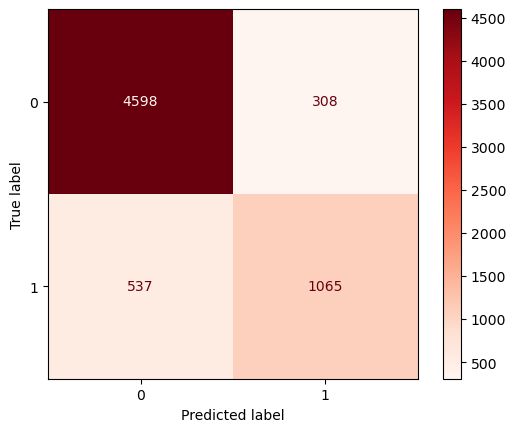

In [51]:
y_pred_test = xgbgridcv_best.predict(X_test)
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgbgridcv_best, X_test, y_test, cmap='Reds'))

There was an increase in the test-set
- False Positives: 308
- False Negatives: 537

There has been an increase in models to predict unknown data

In [52]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Grid Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search
train - f1_score,0.749978,0.719015
test - f1_score,0.701578,0.715966
test - false positive,332.000000,308.000000
test - false negative,557.000000,537.000000


- Model after hyper parameter tuning performs better on the test set with a higher F1 score, suggesting it generalizes better to unseen data than Model before tuning.
- Model after tuning has fewer false positives compared to Model before tuning, indicating it makes fewer incorrect positive predictions.
- Model after tuning also has fewer false negatives compared to Model before tuning, indicating it misses fewer actual positive cases.

Although Model before tuning performs better on the training set, Model after tuning outperforms Model before tuning on the test set in terms of F1 score and has fewer false positives and false negatives. This indicates that Model after tuning is likely to be more reliable and robust when applied to new, unseen data.

Model after tuning make more good-fit 

### Advantages and Disadvantages of Models

Advantages : 
 - Higher F1 Score on Test Set
 - Fewer False Positives and False Negatives
 - The smaller difference between the training and test F1 scores suggests this model is more stable and not overfitting.

Disadvantages :
 - Lower F1 Score on Training Set

Model after tuning is recommended due to its higher performance on the test set and better generalizability, which are crucial for a reliable predictive model.

### Further Improvement

Because the time is very limited, for further improvement i suggest:

- Handling Class Imbalance, Use techniques like SMOTE to balance the class distribution.
- Ensambling Methods, use Stacking to Combine multiple models to leverage the strengths of each, improving overall performance.

Implementing these improvements can help enhance the performance and robustness of my predictive models.



# 9. Model Saving

In [53]:
#save model
with open('model_xgb.pkl', 'wb') as file_1:
  pickle.dump(xgbgridcv_best, file_1)

# 10. Conclusion

## Conceptual Problem :
1. Background of bagging : 
Bagging, short for Bootstrap Aggregating, is an ensemble learning technique designed to improve the stability and accuracy of machine learning algorithms.
In machine learning, single models can be sensitive to small changes in the training data, leading to high variance. This sensitivity can result in models that do not generalize well to new data.
 
 How Bagging Works :
 
    1. Dataset Sampling : Bootstrap Sampling
    2. Model Training : Independent Training
    3. Aggregation of Predictions :
        - For Classification : Each model makes a prediction, and the final prediction is determined by majority voting (the class that receives the most votes is chosen).
        - For Regression : Each model makes a prediction, and the final prediction is the average of all the predictions from the individual models.

2. The Differences Random forest and XGBoost:

    Methodology:
     - Random Forest: Uses bagging (bootstrap aggregating) to build independent trees and aggregate their predictions.
     - XGBoost: Uses boosting to build trees sequentially, where each tree corrects the errors of the previous ones.

    Training Process:
     - Random Forest: Trees are built independently and can be parallelized.
     - XGBoost: Trees are built sequentially with gradient descent optimization, making it more iterative and dependent on previous trees.
    
    Feature Selection:
     - Random Forest: Randomly selects a subset of features for each tree split.
     - XGBoost: Uses all features but applies regularization to prevent overfitting.

    Regularization:
     - Random Forest: Implicitly controls overfitting by averaging predictions and random feature selection.
     - XGBoost: Explicitly controls overfitting with regularization terms in the objective function and shrinkage (learning rate).

    Handling of Missing Values:
     - Random Forest: Typically requires preprocessing to handle missing values.
     - XGBoost: Can natively handle missing values during training.

3. Definition of Cross-Validation :

Cross Validation (CV) is a statistical method used to estimate the skill of a machine learning model on unseen data. It is primarily used to assess how well the model generalizes to an independent dataset. Cross Validation is a crucial technique in machine learning for model evaluation and selection, ensuring that the model performs well on unseen data and providing a realistic estimate of its performance.

## Conclusion

After thorough implementation and evaluation, XGBoost was selected as the best-performing model based on its cross-validation results. XGBoost consistently achieved the highest average F1 score, indicating its superior ability to accurately identify positive instances while minimizing false negatives and false positives.

This robust performance demonstrates that XGBoost is well-suited for this binary classification task, effectively balancing precision and recall to deliver reliable predictions on whether an individual's income exceeds $50,000.

## Business Recommendation

By using this predictive model, to assist HR departments in identifying potential high-earning candidates.
